# SPACEc: ML-enabled cell type annotation (STELLAR)

After preprocessing the single-cell data, the next step is to assign cell types. Alternatively to the SVM (see notebook 3_cell_annotation_ml) model we included a wrapper for STELLAR, that allows to use the model in a more user-friendly way. Further information about STELLAR can be found here: http://snap.stanford.edu/stellar/

In [1]:
# import spacec first
import spacec as sp

#import standard packages
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import sys
import os
from git import Repo
import anndata

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80, facecolor='white')

INFO:root: * TissUUmaps version: 3.1.1.6
/home/tim/miniforge3/envs/spacec/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/tim/miniforge3/envs/spacec/lib/python3.9/site-packages/cudf/utils/gpu_utils.py:89: UserWarning: A GPU with NVIDIA Volta™ (Compute Capability 7.0) or newer architecture is required.
Detected GPU 0: NVIDIA GeForce GTX 1070                                                                                                                                                                                                                                         
Detected Compute Capability: 6.1
  warnings.warn(


In [2]:
# Specify the path to the data
root_path = "/home/user/path/SPACEc/" # inset your own path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

# STELLAR path
STELLAR_path = Path(root_path + 'example_data/STELLAR/')

# Test if the path exists, if not create it
if not STELLAR_path.exists():
    STELLAR_path.mkdir(exist_ok=True, parents=True)
    repo_url = 'https://github.com/snap-stanford/stellar.git'
    Repo.clone_from(repo_url, STELLAR_path)

## Data Explanation
Annotated tonsil data is used as training & test data. </br>
Tonsillitis data is used as validation data.

In [4]:
# Load training data
adata = sc.read(output_dir + "adata_nn_demo_annotated.h5ad")
adata_train = adata[adata.obs['condition'] == 'tonsil']
adata_val  = adata[adata.obs['condition'] == 'tonsillitis']

## Training

In [5]:
import numpy as np
np.isnan(adata_train.X).sum()

0

In [6]:
# downsample the data for demonstration purposes
adata_train = adata_train[0:1000, :]
adata_val = adata_val[0:1000, :]

In [7]:
adata_new = sp.tl.adata_stellar(adata_train, 
               adata_val, 
               celltype_col = "cell_type", 
               x_col = 'x', 
               y_col = 'y', 
               sample_rate = 0.5, 
               distance_thres = 50,
               STELLAR_path = STELLAR_path)

Preparing input data
Building dataset
Running STELLAR
         Falling back to preprocessing with `sc.pp.pca` and default params.


Computing METIS partitioning...
Done!


Loss: 2.237149


Computing METIS partitioning...
Done!


Loss: 0.928735


Computing METIS partitioning...
Done!


Loss: 0.684190


Computing METIS partitioning...
Done!


Loss: 0.572017


Computing METIS partitioning...
Done!


Loss: 0.502303


Computing METIS partitioning...
Done!


Loss: 0.448647


Computing METIS partitioning...
Done!


Loss: 0.406881


Computing METIS partitioning...
Done!


Loss: 0.371281


Computing METIS partitioning...
Done!


Loss: 0.346250


Computing METIS partitioning...
Done!


Loss: 0.323699


Computing METIS partitioning...
Done!


Loss: 0.302637


Computing METIS partitioning...
Done!


Loss: 0.286958


Computing METIS partitioning...
Done!


Loss: 0.273654


Computing METIS partitioning...
Done!


Loss: 0.258830


Computing METIS partitioning...
Done!


Loss: 0.251026


Computing METIS partitioning...
Done!


Loss: 0.244413


Computing METIS partitioning...
Done!


Loss: 0.237930


Computing METIS partitioning...
Done!


Loss: 0.232046


Computing METIS partitioning...
Done!


Loss: 0.233523


Computing METIS partitioning...
Done!


Loss: 0.221670


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.093954


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.896790


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.284005


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.209281


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.157147


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.157361


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.068299


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.099013


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.043633


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.081980


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.055788


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.059038


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.043263


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.047102


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.044601


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.001311


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.003115


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.033478


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.029879


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.025037


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.063846


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.000488


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.000435


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.096257


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.007849


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.034967


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.004217


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.023694


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.026860


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.111071


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.067288


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.008144


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.041159


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.026449


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.088483


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.077746


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.063356


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.043450


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.019570


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.033152


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.043104


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.021286


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.047572


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.043748


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.000301


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.031850


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.062338


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.038398


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.057324


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.090590


## Inspect the results

In [13]:
adata_new.obs

,DAPI,x,y,area,region_num,unique_region,condition,leiden_1,leiden_1_subcluster,cell_type_coarse,cell_type_coarse_subcluster,cell_type_coarse_f,cell_type_coarse_f_subcluster,cell_type,stellar_pred
0,105.993197,1472.238095,4.986395,147.0,1,reg002,tonsillitis,10,10,Vessel,Vessel,Vessel,Vessel,Vessel,12
1,123.677686,1322.851240,5.359504,242.0,1,reg002,tonsillitis,15,15,M2 Macrophage,M2 Macrophage,M2 Macrophage,M2 Macrophage,M2 Macrophage,12
2,107.203125,1506.226562,5.710938,256.0,1,reg002,tonsillitis,10,10,Vessel,Vessel,Vessel,Vessel,Vessel,12
4,148.702532,1303.702532,9.006329,158.0,1,reg002,tonsillitis,17,"17,2",recluster,"recluster,9",recluster,"recluster,14",CD4+ T cell,11
5,148.981132,1485.911950,8.899371,159.0,1,reg002,tonsillitis,10,10,Vessel,Vessel,Vessel,Vessel,Vessel,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,27.318707,1679.764434,264.575058,433.0,1,reg002,tonsillitis,21,21,Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,Epithelial cell,10
1035,76.632812,1731.346354,264.697917,384.0,1,reg002,tonsillitis,12,"12,3",DC,DC,DC,DC,DC,11
1036,97.325123,1899.123153,265.847291,203.0,1,reg002,tonsillitis,3,"3,1",DC,DC,DC,DC,DC,11
1037,84.231092,1957.092437,265.638655,238.0,1,reg002,tonsillitis,4,4,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,11


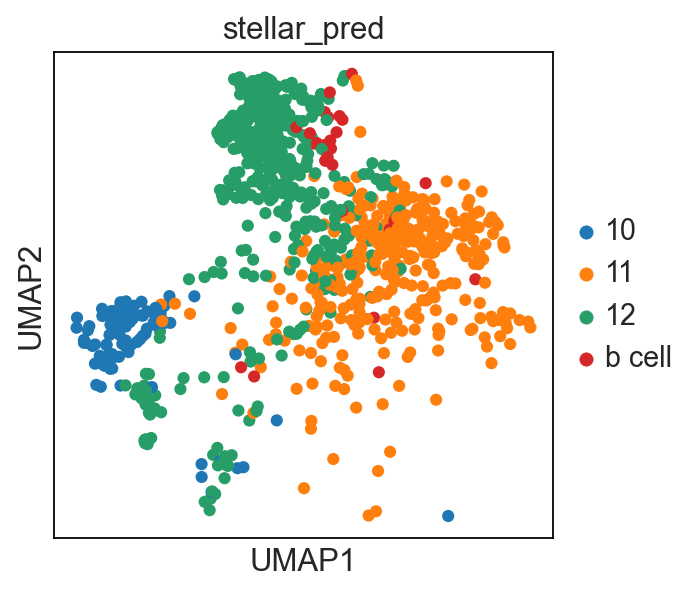

In [14]:
sc.pl.umap(adata_new, color = 'stellar_pred')

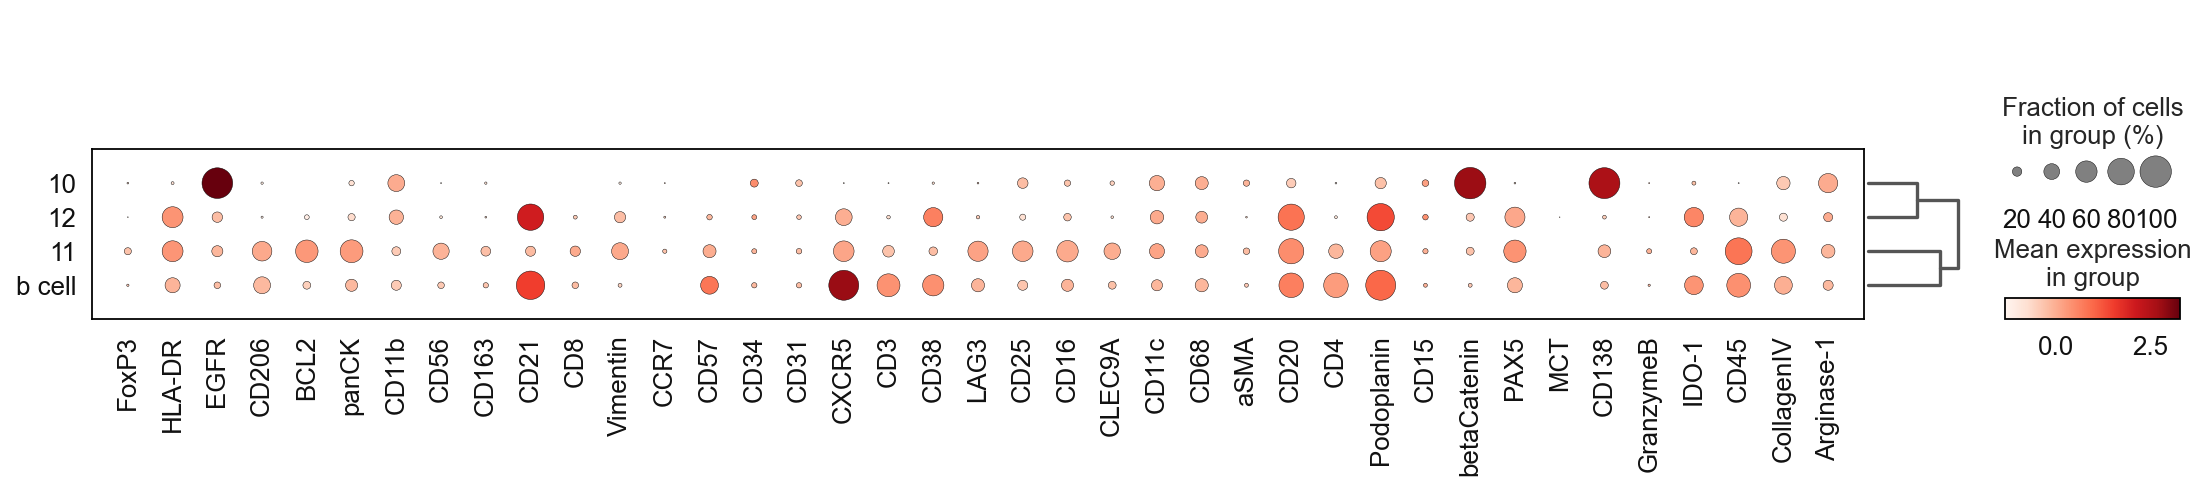

In [22]:
marker_list = [
    'FoxP3', 'HLA-DR', 'EGFR', 'CD206', 'BCL2', 'panCK', 'CD11b', 'CD56', 'CD163', 'CD21', 'CD8', 
    'Vimentin', 'CCR7', 'CD57', 'CD34', 'CD31', 'CXCR5', 'CD3', 'CD38', 'LAG3', 'CD25', 'CD16', 'CLEC9A', 'CD11c', 
    'CD68', 'aSMA', 'CD20', 'CD4','Podoplanin', 'CD15', 'betaCatenin', 'PAX5', 
    'MCT', 'CD138', 'GranzymeB', 'IDO-1', 'CD45', 'CollagenIV', 'Arginase-1']

sc.pl.dotplot(adata_new, marker_list, 'stellar_pred', dendrogram = True)

## Single-cell visualzation

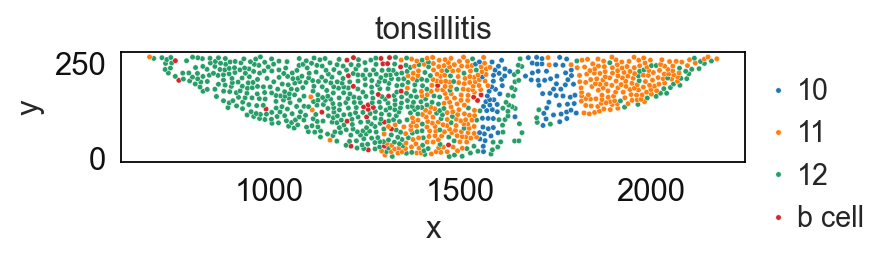

In [15]:
sp.pl.catplot(
    adata_new, color = "stellar_pred", # specify group column name here e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir=output_dir, # specify output directory here (if savefig=True)
)

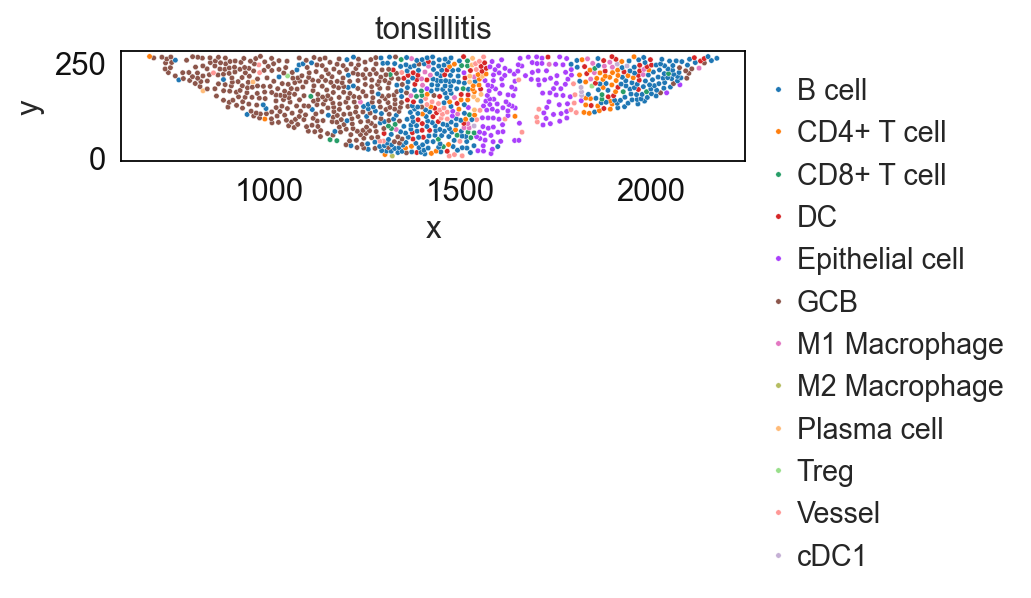

In [16]:
sp.pl.catplot(
    adata_new, color = "cell_type", # specify group column name here e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir=output_dir,) # specify output directory here (if savefig=True)